#  Exploratory Data Analysis (EDA) 
This notebook provides a complete EDA pipeline including:
- Data loading
- Summary statistics
- Missing values
- Univariate & multivariate analysis
- Outlier detection
- Correlation heatmap
- Handling missing data
- Saving cleaned data

## 1. Importing necessary library.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## 2. Load the Dataset

In [4]:
# Load Titanic dataset 
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 3. Basic Information

In [5]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
df.describe(include='all')

Shape: (891, 15)

Data Types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Missing Values Heatmap

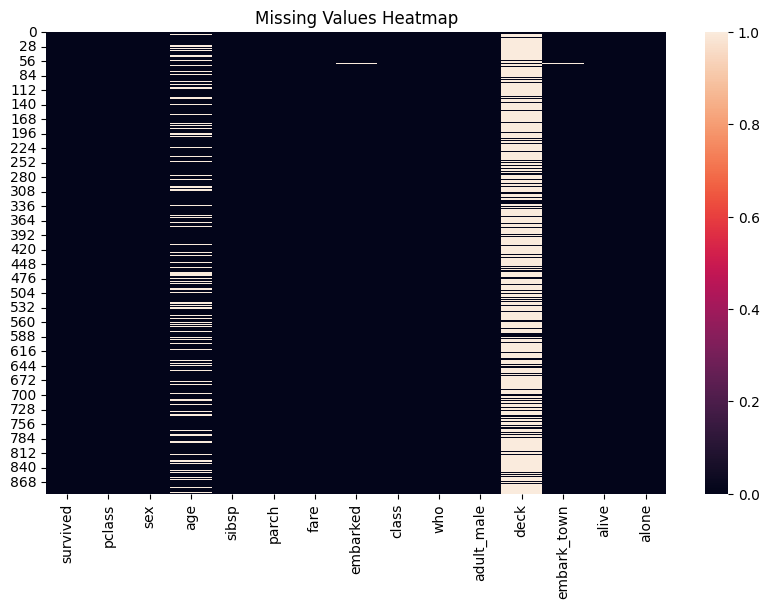

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True)
plt.title('Missing Values Heatmap')
plt.show()

## 5. Univariate Analysis

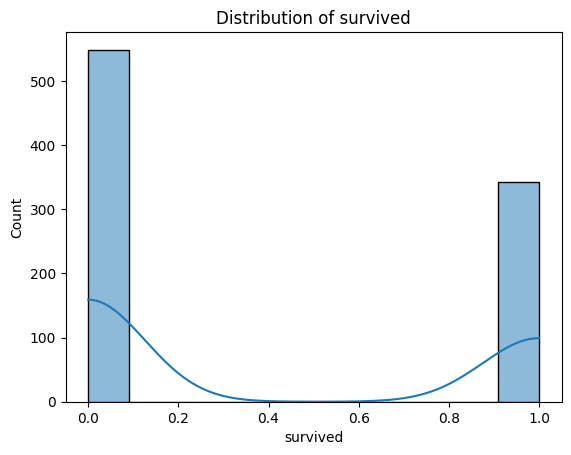

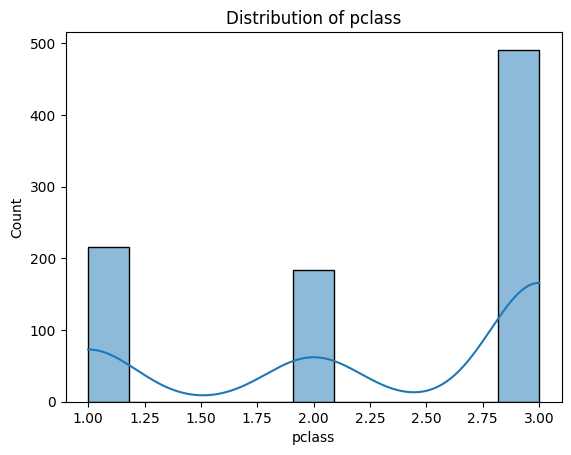

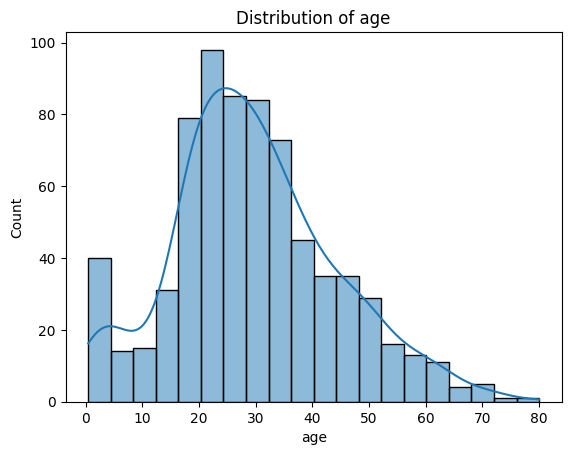

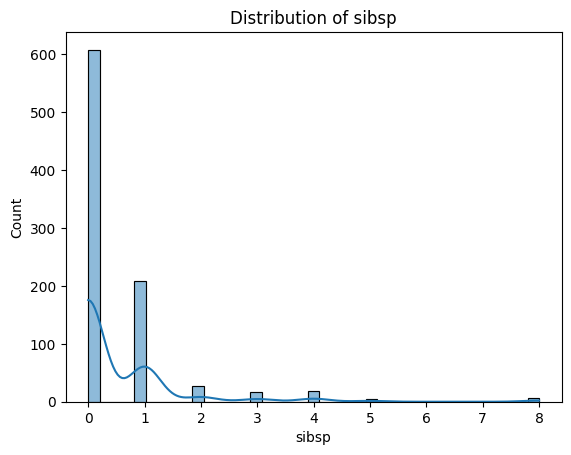

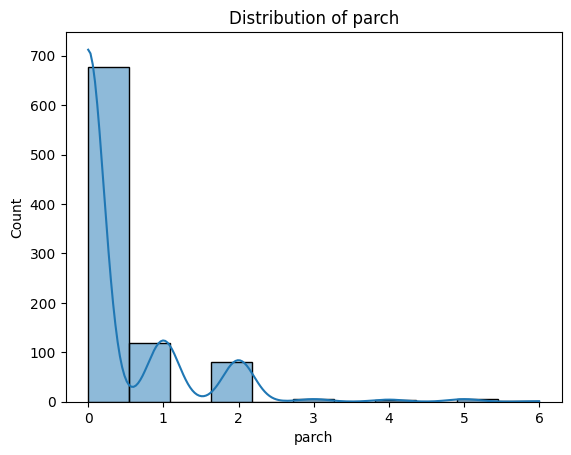

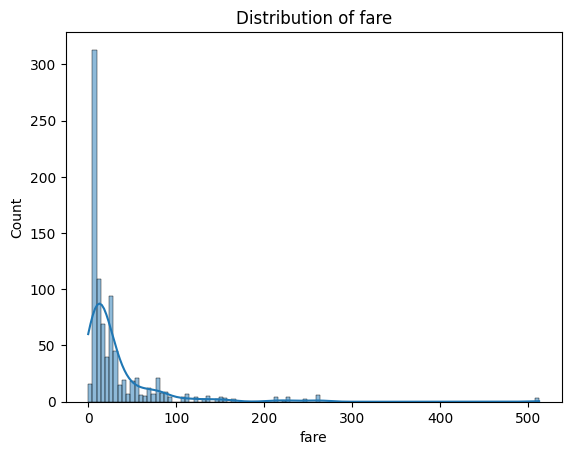

In [9]:
# Numerical features
num_cols = df.select_dtypes(include='number').columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 6. Outlier Detection (Box Plots + Z-score)

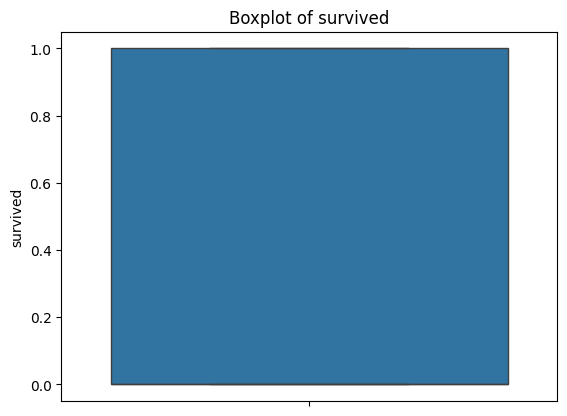

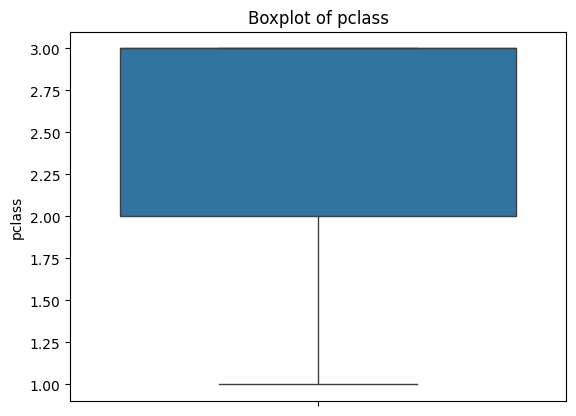

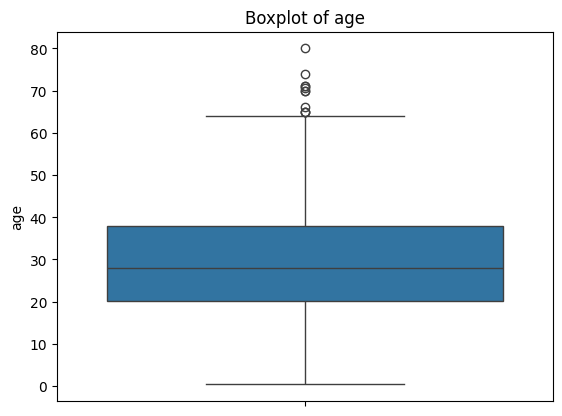

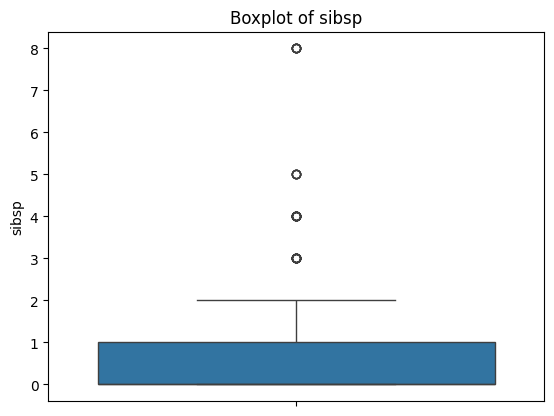

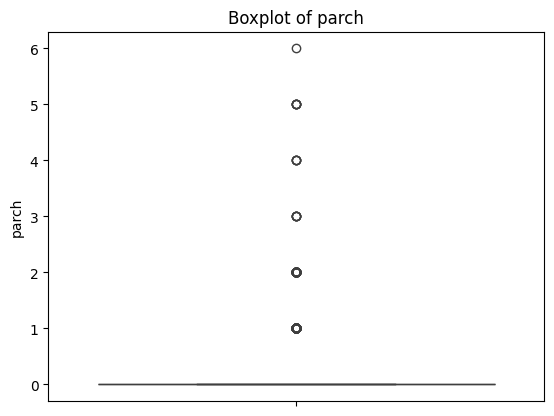

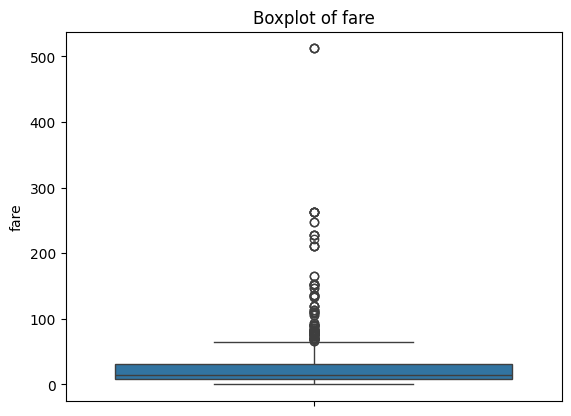

survived     0
pclass       0
age          2
sibsp       23
parch       15
fare        18
dtype: int64


In [11]:
for col in num_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

z_scores = np.abs(stats.zscore(df[num_cols].dropna()))
print(pd.Series((z_scores > 3).sum(axis=0), index=num_cols))

## 7. Correlation Heatmap

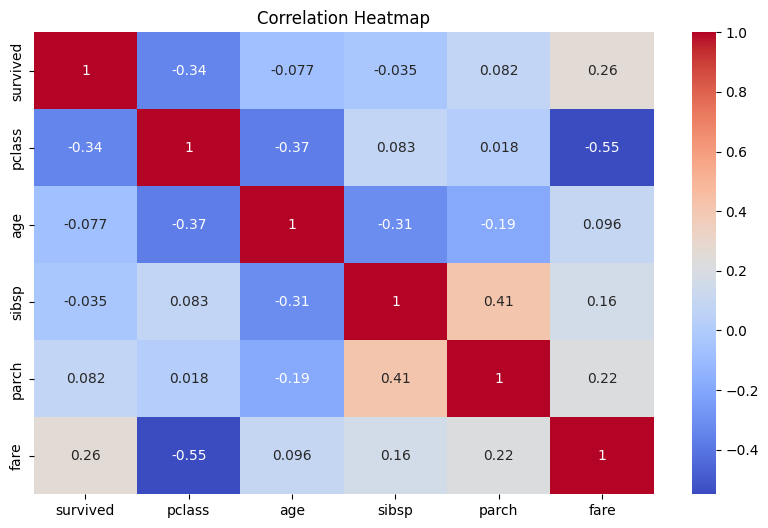

In [12]:
corr = df[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 8. Multivariate Analysis

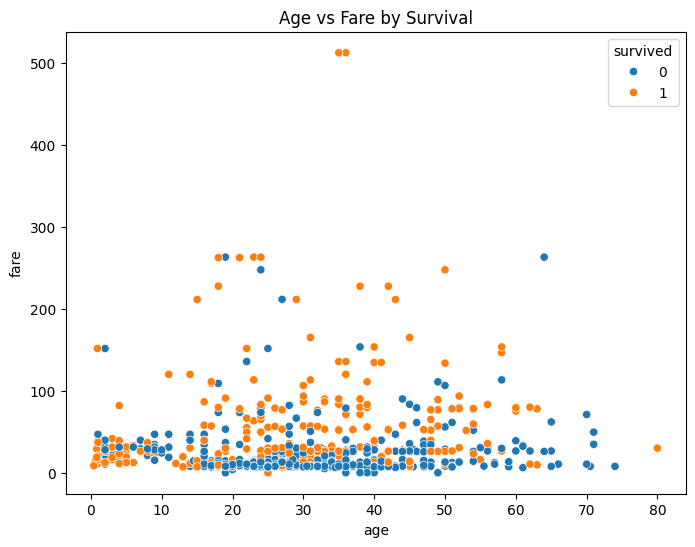

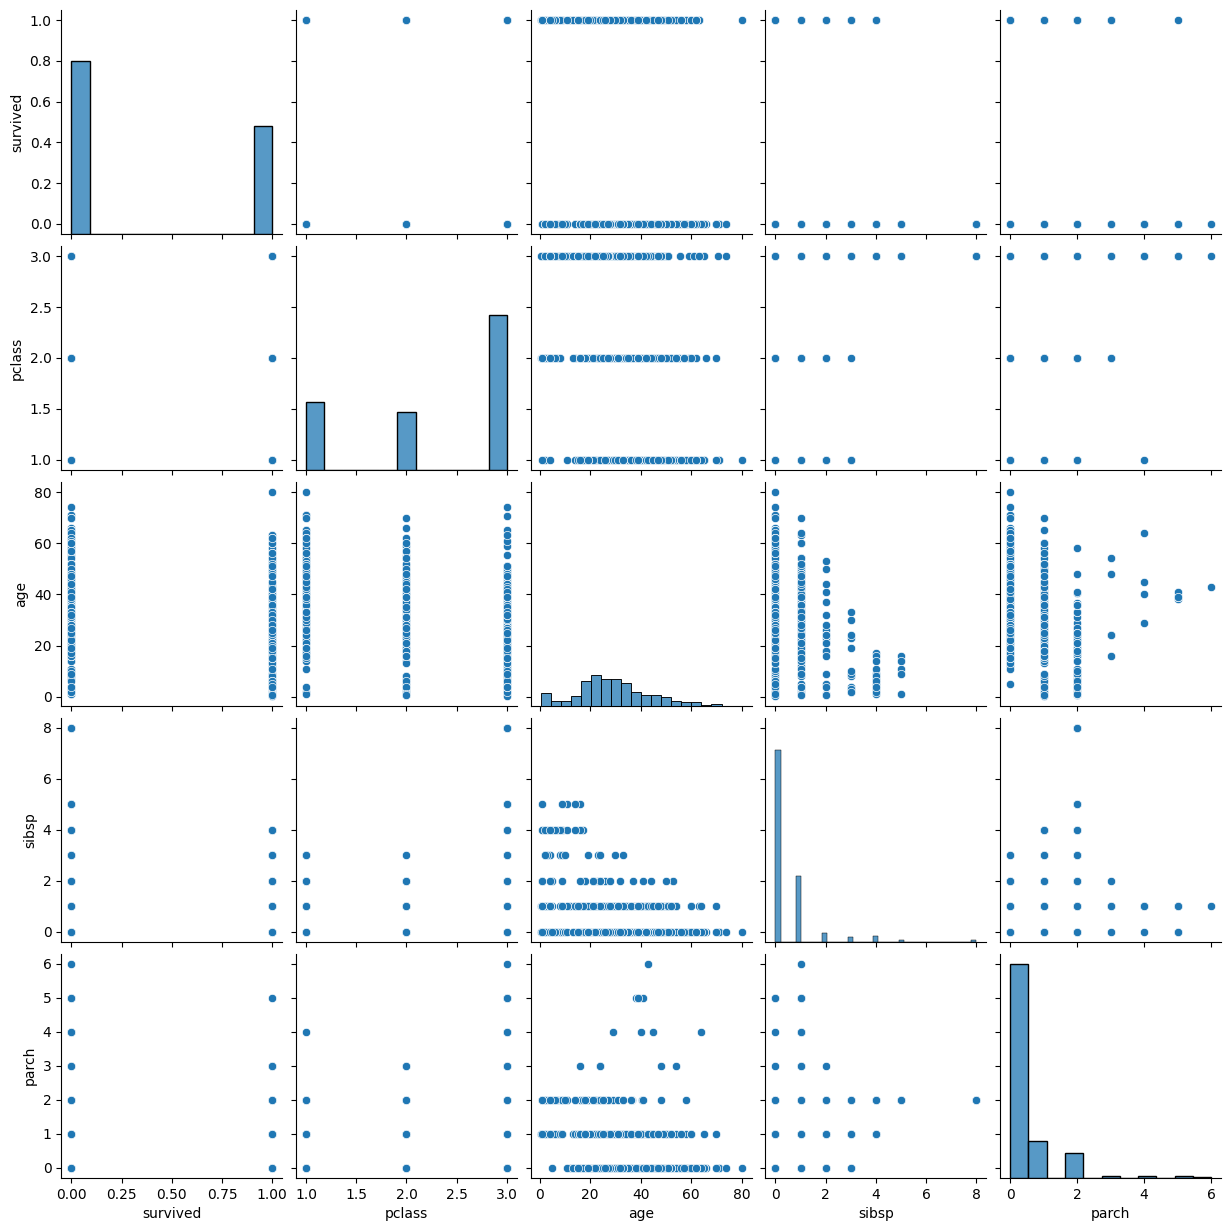

In [15]:
if 'survived' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='age', y='fare', hue='survived')
    plt.title('Age vs Fare by Survival')
    plt.show()

sns.pairplot(df[num_cols.dropna().tolist()[:5]])
plt.show()

## 9. Handle Missing Values

In [16]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['float64', 'int64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("✅ Missing values handled.")

✅ Missing values handled.


## 10. Insight Summary

In [22]:
"""Feature	            Key Insights

    age	                Missing values (~20%), right-skewed, younger passengers survived more.
    fare            	Skewed, many outliers in upper classes.
    sex	                Females had much higher survival rate.
    class          	    First class had better survival odds.
    embarked	        Few missing values; most from "S".
    survived	        ~38% survived; strong bias by sex and class."""


'Feature\t            Key Insights\n\n    age\t                Missing values (~20%), right-skewed, younger passengers survived more.\n    fare            \tSkewed, many outliers in upper classes.\n    sex\t                Females had much higher survival rate.\n    class          \t    First class had better survival odds.\n    embarked\t        Few missing values; most from "S".\n    survived\t        ~38% survived; strong bias by sex and class.'